## Kernel Cobra

We will be using this Jupyter notebook to test our Kernel-Cobra methods, as well as conduct experiments on Kernel-Cobra and MixCobra.

We will start, like with other examples, by setting up a standard data-set to train our machines.

In [1]:
from pycobra.cobra import Cobra
from pycobra.kernelcobra import KernelCobra
from pycobra.mixcobra import MixCobra
from pycobra.generalcobra import GeneralCobra


from pycobra.ewa import Ewa
from pycobra.diagnostics import Diagnostics
from pycobra.visualisation import Visualisation
import numpy as np


%matplotlib inline

In [2]:
# setting up our random data-set
rng = np.random.RandomState(1)

# D1 = train machines; D2 = create COBRA; D3 = calibrate epsilon, alpha; D4 = testing
n_features = 20
D1, D2, D3, D4 = 200, 200, 200, 200
D = D1 + D2 + D3 + D4
X = rng.uniform(-1, 1, D * n_features).reshape(D, n_features)
Y = np.power(X[:,1], 2) + np.power(X[:,3], 3) + np.exp(X[:,10]) 
# Y = np.power(X[:,0], 2) + np.power(X[:,1], 3)

# training data-set
X_train = X[:D1 + D2]
X_test = X[D1 + D2 + D3:D1 + D2 + D3 + D4]
X_eps = X[D1 + D2:D1 + D2 + D3]
# for testing
Y_train = Y[:D1 + D2]
Y_test = Y[D1 + D2 + D3:D1 + D2 + D3 + D4]
Y_eps = Y[D1 + D2:D1 + D2 + D3]

## COBRA

In [3]:
cobra = Cobra()

In [4]:
cobra.set_epsilon(X_eps, Y_eps, grid_points=10)

In [5]:
cobra.fit(X_train, Y_train)

Cobra(epsilon=0.6701172097673681, random_state=None)

In [6]:
cobra.predict(X_test)

array([0.74064143, 1.52572495, 0.9757245 , 1.34618212, 0.64429409,
       2.3768142 , 2.12204565, 1.60000102, 0.67032831, 0.37257016,
       1.19625321, 1.73229887, 0.94430466, 2.62667993, 1.81214925,
       2.10621838, 0.41222491, 0.6071127 , 2.87838261, 1.22682122,
       2.32383629, 2.35765825, 0.96959714, 1.15864361, 0.98756288,
       2.84239802, 2.65378656, 1.9673034 , 2.30431888, 1.02573669,
       1.64494317, 2.89087034, 1.26456849, 0.71121495, 0.74637202,
       2.68988949, 2.34020865, 0.94321703, 0.83657045, 1.54395871,
       1.45493403, 0.62254335, 1.2930972 , 1.30021972, 1.75433876,
       1.92108246, 1.23786183, 0.74965091, 0.99686444, 2.11173168,
       0.66457344, 1.14493578, 1.18708344, 0.87300999, 2.79920064,
       0.85322606, 2.63105618, 1.08741276, 2.08844425, 0.69574987,
       1.28062887, 0.5890653 , 1.46698106, 1.77494991, 1.26572203,
       0.89725814, 1.29488575, 1.84573973, 0.63840456, 0.68676602,
       2.85488368, 0.67993983, 0.98838892, 2.73852015, 1.39587

## Kernel COBRA

In [7]:
kernel = KernelCobra()

In [8]:
kernel.fit(X_train, Y_train)

KernelCobra(random_state=None)

In [9]:
kernel.predict(X_test)

array([0.72004005, 1.44819966, 1.02031436, 1.42697131, 0.71099709,
       2.26991398, 2.11823694, 1.58337264, 0.69350165, 0.49792276,
       1.21321214, 1.73925271, 0.92684875, 2.62654595, 1.92679496,
       1.97705865, 0.36576809, 0.68140147, 2.81731868, 1.19764629,
       2.14874247, 2.24173294, 1.05216463, 1.27928916, 0.98932802,
       2.71728135, 2.71928006, 1.85455928, 2.14525804, 1.22560538,
       1.6835995 , 2.82545536, 1.31988443, 0.8625038 , 0.70078479,
       2.4187671 , 2.37459372, 0.88984142, 0.84219735, 1.31385099,
       1.44955654, 0.72214237, 1.29055356, 1.38807943, 1.77544154,
       1.71510642, 1.37451795, 0.71845867, 0.95016888, 1.96280859,
       0.65831736, 1.15793703, 1.14312585, 0.81368509, 2.50254132,
       0.84430579, 2.31099737, 1.06313264, 2.02005538, 0.70189826,
       1.24841002, 0.67985003, 1.62193042, 1.44928946, 1.30029936,
       0.88022998, 1.32597677, 1.49422657, 0.67247545, 0.65676879,
       2.75507512, 0.70097765, 0.98546647, 2.43239563, 1.42757

## Mix COBRA

In [10]:
mixcobra = MixCobra()

In [11]:
mixcobra.fit(X_train, Y_train)

MixCobra(machines=None, random_state=None)

In [12]:
mixcobra.predict(X_test)

array([ 0.51026597,  1.53020345,  0.7279649 ,  1.95518765,  0.9516733 ,
        2.09558205,  1.87677957,  1.65555485,  1.29784194, -0.00736024,
        1.37853292,  1.85465072,  1.01631403,  2.25932618,  1.29525416,
        3.40470927,  0.64563942,  1.30461604,  2.90077162,  1.43462392,
        2.52531822,  2.31199306,  0.79045553,  1.69507585,  1.56973834,
        2.91325391,  2.26994415,  1.59128166,  2.28037329,  1.27461107,
        1.0398006 ,  3.04445729,  2.88406281,  0.93513556,  0.46387052,
        2.90981049,  1.80449192,  0.5090281 ,  1.37705322,  0.25176965,
        1.71036815,  0.97612535,  1.27626087,  1.53101432,  2.54315952,
        1.78584612,  1.1781591 ,  1.07349003,  0.92958871,  1.03878707,
        0.86636399,  0.90548841,  0.83889496,  0.901027  ,  2.20000718,
        0.05774587,  1.58866093,  1.01471706,  2.05733323,  0.58348625,
        1.40423706,  0.72697881,  2.46509802,  1.0364646 ,  0.82595259,
        0.87861648,  1.03573626,  1.7027508 ,  0.61857544,  0.52

## General COBRA

In [13]:
general= GeneralCobra()

In [14]:
general.fit(X_train, Y_train)

GeneralCobra(machines=None, random_state=None)

In [15]:
general.fit(X_train, Y_train)

GeneralCobra(machines=None, random_state=None)

In [16]:
general.predict(X_test)

array([0.72353424, 1.46816556, 0.97246211, 1.39350438, 0.70712139,
       2.30964593, 2.12716075, 1.70668669, 0.64021966, 0.50038256,
       1.25528852, 1.81221987, 0.93436029, 2.64554644, 1.91235969,
       1.9072468 , 0.37446689, 0.63261524, 2.80365987, 1.24740708,
       2.07358725, 2.23366781, 1.06262234, 1.1918606 , 1.0490724 ,
       2.69100399, 2.75230649, 1.75365866, 1.98377651, 1.26490578,
       1.70596689, 2.89346529, 1.34797782, 0.85926702, 0.7275193 ,
       2.43395552, 2.42511549, 0.90632242, 0.85833214, 1.3576546 ,
       1.44812356, 0.61342619, 1.29435093, 1.39205527, 1.67834059,
       1.7856183 , 1.37810364, 0.74313572, 0.93409496, 1.90568031,
       0.6051922 , 1.15337778, 1.2026079 , 0.87615598, 2.50849015,
       0.84928099, 2.33999855, 1.12782124, 2.13065985, 0.70184677,
       1.28913898, 0.68755492, 1.62728234, 1.49056158, 1.3031268 ,
       0.8906618 , 1.35076832, 1.56614173, 0.69727414, 0.67066882,
       2.82167445, 0.67174849, 0.97933816, 2.45035363, 1.52090

## Experiments

Points: the key difference between KernelCobra and MixCobra is that we are not including input distances while constructing the aggregate. We only use output differences. This means that in very high dimensions, the input space indformation might not be very useful, and it also means it will becoime computationally expensive. Our experiments should reflect this well.

Also: When we apply our method, since it is only on output space, a classifier version of this would decompose into the original CobraClassifier.

### Datasets

In [17]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.datasets.samples_generator import make_regression

In [18]:
diabetes = datasets.load_diabetes()

diabetes_X_train = diabetes.data[:-40]
diabetes_X_test = diabetes.data[-40:]

diabetes_y_train = diabetes.target[:-40]
diabetes_y_test = diabetes.target[-40:]

In [20]:
diabetes_cobra = Cobra()
diabetes_cobra.set_epsilon(diabetes_X_train, diabetes_y_train)
diabetes_cobra.fit(diabetes_X_train, diabetes_y_train)

diabetes_kernelcobra = KernelCobra()
diabetes_kernelcobra.fit(diabetes_X_train, diabetes_y_train)

diabetes_generalcobra = GeneralCobra()
diabetes_generalcobra.fit(diabetes_X_train, diabetes_y_train)

diabetes_mixcobra = MixCobra()
diabetes_mixcobra.fit(diabetes_X_train, diabetes_y_train)

MixCobra(machines=None, random_state=None)

In [21]:
boston = datasets.load_boston()

boston_X_train = boston.data[:-40]
boston_X_test = boston.data[-40:]

boston_y_train = boston.target[:-40]
boston_y_test = boston.target[-40:]

In [22]:
boston_cobra = Cobra()
boston_cobra.set_epsilon(boston_X_train, boston_y_train)
boston_cobra.fit(boston_X_train, boston_y_train)

boston_kernelcobra = KernelCobra()
boston_kernelcobra.fit(boston_X_train, boston_y_train)

boston_generalcobra = GeneralCobra()
boston_generalcobra.fit(boston_X_train, boston_y_train)

boston_mixcobra = MixCobra()
boston_mixcobra.fit(boston_X_train, boston_y_train)

MixCobra(machines=None, random_state=None)

## Diagnostics

In [23]:
diagnostics_kernel = Diagnostics(kernel, X_test, Y_test)
diagnostics_mix = Diagnostics(mixcobra, X_test, Y_test)

boston_diagnostics_kernel = Diagnostics(boston_kernelcobra, boston_X_test, boston_y_test, load_MSE=False)
boston_diagnostics_mix = Diagnostics(boston_mixcobra, boston_X_test, boston_y_test, load_MSE=False)

diabetes_diagnostics_kernel = Diagnostics(diabetes_kernelcobra, diabetes_X_test, diabetes_y_test, load_MSE=False)
diabetes_diagnostics_mix = Diagnostics(diabetes_mixcobra, diabetes_X_test, diabetes_y_test, load_MSE=False)

In [24]:
(alpha_, beta_, bandwidth_mix), mix_mse = diagnostics_mix.optimal_mix(X_test, Y_test)

(alpha_boston, beta_boston, bandwidth_boston_mix), boston_mix_mse = boston_diagnostics_mix.optimal_mix(boston_X_test, boston_y_test)
(alpha_diabetes, beta_diabetes, bandwidth_diabetes_mix), diabetes_mix_mse = diabetes_diagnostics_mix.optimal_mix(diabetes_X_test, diabetes_y_test)

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))
/Users/bhargavvader/

In [25]:
bandwidth_, bandwidth_mse = diagnostics_kernel.optimal_kernelbandwidth(X_test, Y_test, bandwidths=np.arange(0.05, 2.55, step=0.10))
bandwidth_boston, boston_kernel_mse = boston_diagnostics_kernel.optimal_kernelbandwidth(boston_X_test, boston_y_test,bandwidths=np.arange(0.05, 2.55, step=0.10))
bandwidth_diabetes, diabetes_kernel_mse = diabetes_diagnostics_kernel.optimal_kernelbandwidth(diabetes_X_test, diabetes_y_test,bandwidths=np.arange(0.05, 2.55, step=0.10))

### Visualisation

In [26]:
diabetes_visualisation = Visualisation(diabetes_cobra, diabetes_X_test, diabetes_y_test, estimators={"Cobra":diabetes_cobra,"GeneralCoba" : diabetes_generalcobra, "KernelCobra" : diabetes_kernelcobra, "MixCobra" : diabetes_mixcobra}, alpha=alpha_diabetes, beta=beta_diabetes, bandwidth_mix = bandwidth_diabetes_mix, bandwidth_kernel=bandwidth_diabetes)

In [27]:
boston_visualisation = Visualisation(boston_cobra, boston_X_test, boston_y_test, estimators={"Cobra":boston_cobra, "GeneralCoba" : boston_generalcobra, "KernelCobra" : boston_kernelcobra, "MixCobra" : boston_mixcobra}, alpha=alpha_boston, beta=beta_boston, bandwidth_mix = bandwidth_boston_mix, bandwidth_kernel=bandwidth_boston)

In [28]:
visualisation = Visualisation(cobra, X_test, Y_test, estimators={"Cobra":cobra, "GeneralCobra" : general, "KernelCobra" : kernel, "MixCobra" : mixcobra}, alpha=alpha_, beta=beta_, bandwidth_mix = bandwidth_mix, bandwidth_kernel=bandwidth_)

In [29]:
visualisation_machines = Visualisation(cobra, X_test, Y_test)

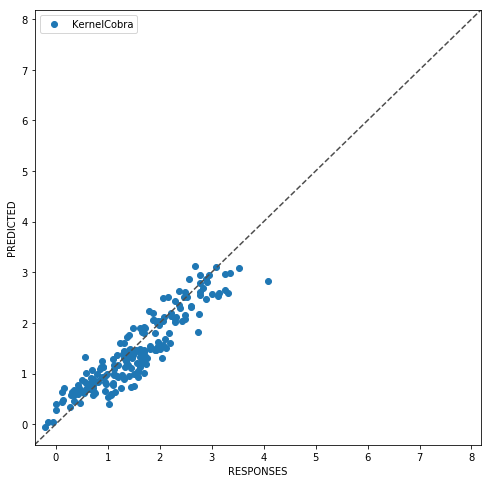

<module 'matplotlib.pyplot' from '/Users/bhargavvader/open_source/pycobra/venv/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [30]:
visualisation.QQ("KernelCobra")

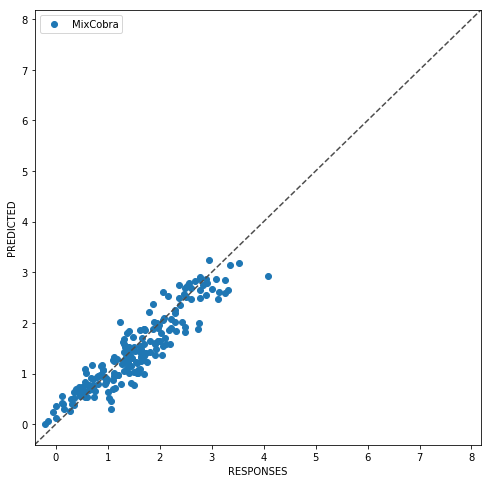

<module 'matplotlib.pyplot' from '/Users/bhargavvader/open_source/pycobra/venv/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [31]:
visualisation.QQ("MixCobra")

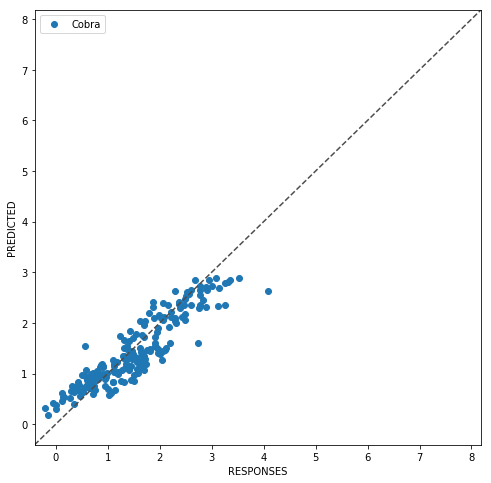

<module 'matplotlib.pyplot' from '/Users/bhargavvader/open_source/pycobra/venv/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [32]:
visualisation.QQ("Cobra")

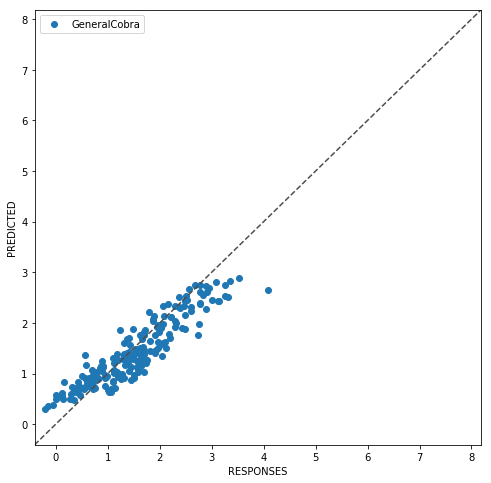

<module 'matplotlib.pyplot' from '/Users/bhargavvader/open_source/pycobra/venv/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [33]:
visualisation.QQ("GeneralCobra")

In [34]:
diabetes_visualisation.machine_MSE

{'Cobra': 2360.368001152326,
 'GeneralCoba': 5625.763831164497,
 'KernelCobra': 1999.1693678000033,
 'MixCobra': 2585.2351057915844}

In [35]:
boston_visualisation.machine_MSE

{'Cobra': 23.200625420198737,
 'GeneralCoba': 27.416714062573238,
 'KernelCobra': 12.315873072769673,
 'MixCobra': 15.29529613072943}

In [36]:
visualisation.machine_MSE

{'Cobra': 0.12935329660781875,
 'GeneralCobra': 0.12958129159294132,
 'KernelCobra': 0.11246852940686783,
 'MixCobra': 0.10896717705648315}

In [37]:
visualisation_machines.machine_MSE

{'Cobra': 0.12935329660781875,
 'lasso': 0.14759631809852203,
 'random_forest': 0.1163494823639898,
 'ridge': 0.16679501938509553,
 'svm': 0.1673412816340336,
 'tree': 0.1848718718766909}

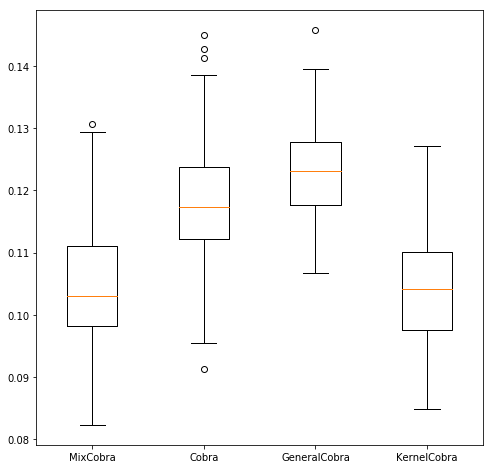

In [38]:
visualisation.boxplot()

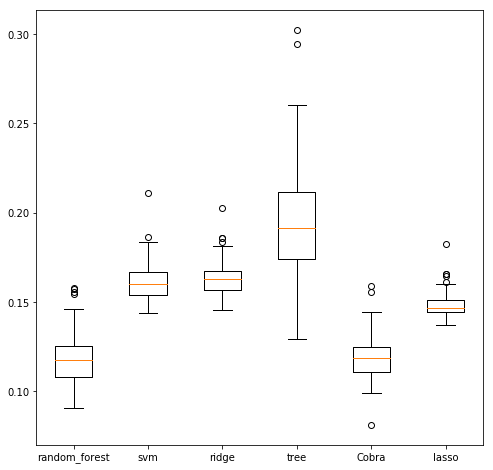

In [39]:
visualisation_machines.boxplot()

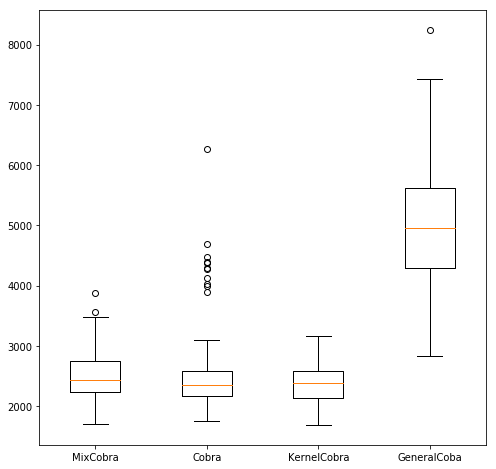

In [40]:
diabetes_visualisation.boxplot()

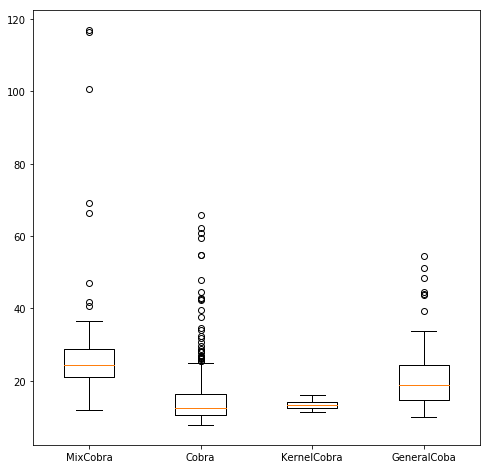

In [41]:
boston_visualisation.boxplot()

### Timing

In [42]:
import time

In [43]:
# setting up our random data-set
rng = np.random.RandomState(1)

# D1 = train machines; D2 = create COBRA; D3 = calibrate epsilon, alpha; D4 = testing
n_features = [5, 10, 20, 50, 100, 1000, 5000, 10000]
cobra_times = []
mix_times = []
kernel_times = []


for features in n_features:
    D1, D2, D3, D4 = 200, 200, 200, 200
    D = D1 + D2 + D3 + D4
    X = rng.uniform(-1, 1, D * features).reshape(D, features)
    Y = np.power(X[:,1], 2) + np.power(X[:,3], 3) + np.exp(X[:,4]) 
    # Y = np.power(X[:,0], 2) + np.power(X[:,1], 3)

    # training data-set
    X_train = X[:D1 + D2]
    X_test = X[D1 + D2 + D3:D1 + D2 + D3 + D4]
    X_eps = X[D1 + D2:D1 + D2 + D3]
    # for testing
    Y_train = Y[:D1 + D2]
    Y_test = Y[D1 + D2 + D3:D1 + D2 + D3 + D4]
    Y_eps = Y[D1 + D2:D1 + D2 + D3]
    
    cobra = Cobra().fit(X_train, Y_train)
    start = time.time()
    cobra.predict(X_test)
    print("Cobra", features, time.time() - start)
    cobra_times.append(time.time() - start)
    
    kernel = KernelCobra().fit(X_train, Y_train)
    start = time.time()
    kernel.predict(X_test)
    print("Kernel", features, time.time() - start)
    kernel_times.append(time.time() - start)

    mix = MixCobra().fit(X_train, Y_train)
    start = time.time()
    mix.predict(X_test)
    print("Mix", features, time.time() - start)
    mix_times.append(time.time() - start)


Cobra 5 1.08831787109375
Kernel 5 0.7605869770050049
Mix 5 2.8781819343566895
Cobra 10 1.0833590030670166
Kernel 10 0.7383708953857422
Mix 10 2.830644130706787
Cobra 20 1.095538854598999
Kernel 20 0.7551059722900391
Mix 20 2.829927921295166
Cobra 50 1.067641019821167
Kernel 50 0.7592129707336426
Mix 50 2.8120460510253906
Cobra 100 1.0758180618286133
Kernel 100 0.7696628570556641
Mix 100 2.916606903076172
Cobra 1000 1.1288609504699707
Kernel 1000 0.7954709529876709


/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))


Mix 1000 3.5224831104278564
Cobra 5000 1.5617289543151855
Kernel 5000 0.9993999004364014


/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))


Mix 5000 5.488613128662109
Cobra 10000 1.4457769393920898
Kernel 10000 1.307887077331543


/Users/bhargavvader/open_source/pycobra/pycobra/mixcobra.py:141: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(np.exp(- bandwidth * a), np.sum(np.exp(- bandwidth * a)))


Mix 10000 7.333199977874756


In [44]:
import matplotlib.pyplot as plt


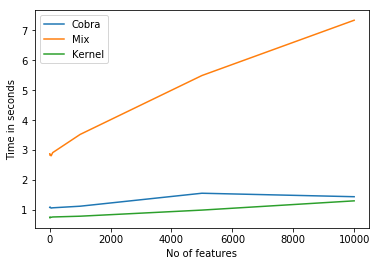

In [50]:
plt.plot(n_features, cobra_times, label="Cobra")
plt.plot(n_features, mix_times, label="Mix")
plt.plot(n_features, kernel_times, label="Kernel")
plt.xlabel("No of features")
plt.ylabel("Time in seconds")
plt.legend()